In [362]:
%matplotlib inline
import os, sys

import matplotlib
matplotlib.style.use("ggplot")
import matplotlib.pyplot as plt
import pandas as pd
import yaml

import pcse
from pcse.models import Wofost72_WLP_FD, Wofost80_NWLP_FD_beta, LINTUL3
from pcse.fileinput import CABOFileReader, YAMLCropDataProvider, PCSEFileReader
from pcse.db import NASAPowerWeatherDataProvider
from pcse.util import WOFOST72SiteDataProvider, WOFOST80SiteDataProvider
from pcse.base import ParameterProvider
from pcse.fileinput import YAMLAgroManagementReader

In [363]:
print(os.getcwd())

/home/tmrob2/PycharmProjects/farming-gym


In [364]:
data_dir = os.path.join(os.getcwd(), 'farm_gym/envs/env_data/')

In [365]:
crop_params_dir = os.path.join(data_dir, 'crop_params/')
crop = YAMLCropDataProvider(crop_params_dir)

YAMLCropDataProvider - Failed to load cache file: [Errno 2] No such file or directory: 'barley'


In [366]:
crop.get_crops_varieties()

{'barley': dict_keys(['Spring_barley_301']),
 'cassava': dict_keys(['Cassava_VanHeemst_1988']),
 'chickpea': dict_keys(['Chickpea_VanHeemst_1988']),
 'cotton': dict_keys(['Cotton_VanHeemst_1988']),
 'cowpea': dict_keys(['Cowpea_VanHeemst_1988']),
 'fababean': dict_keys(['Faba_bean_801']),
 'groundnut': dict_keys(['Groundnut_VanHeemst_1988']),
 'maize': dict_keys(['Maize_VanHeemst_1988', 'Grain_maize_201', 'Grain_maize_202', 'Grain_maize_203', 'Grain_maize_204', 'Grain_maize_205']),
 'millet': dict_keys(['Millet_VanHeemst_1988']),
 'mungbean': dict_keys(['Mungbean_VanHeemst_1988']),
 'pigeonpea': dict_keys(['Pigeonpea_VanHeemst_1988']),
 'potato': dict_keys(['Potato_701', 'Potato_702', 'Potato_703', 'Potato_704']),
 'rapeseed': dict_keys(['Oilseed_rape_1001', 'Oilseed_rape_1002', 'Oilseed_rape_1003', 'Oilseed_rape_1004']),
 'rice': dict_keys(['Rice_501', 'Rice_HYV_IR8', 'Rice_IR64616H_DS', 'Rice_IR64616H_WS', 'Rice_IR64', 'Rice_IR72', 'Rice_IR72_DS', 'Rice_IR72_WS', 'Rice_IR8A']),
 'sor

In [367]:
soil_data = os.path.join(data_dir, 'SOILD', 'EC4.NEW')
soil = CABOFileReader(soil_data)
#soil = PCSEFileReader(soil_data)

In [368]:
sited = WOFOST72SiteDataProvider(WAV=10)

In [369]:
parameterprovider = ParameterProvider(soildata=soil, cropdata=crop, sitedata=sited)

In [370]:
def get_weatherdataprovider(lat, long):
    location = (lat, long)
    return pcse.db.NASAPowerWeatherDataProvider(*location)
wdp = get_weatherdataprovider(-33.385300, 148.007904)
#wdp = get_weatherdataprovider(51.970, 5.670)
print(wdp)

Weather data provided by: NASAPowerWeatherDataProvider
--------Description---------
NASA/POWER CERES/MERRA2 Native Resolution Daily Data
----Site characteristics----
Elevation:  291.1
Latitude:  -33.385
Longitude: 148.008
Data available for 1984-01-01 - 2022-07-21
Number of missing days: 1



In [371]:
agro_dir = os.path.join(os.getcwd(), "farm_gym/envs/env_data/agro/")
agromanagement_file = os.path.join(agro_dir, 'baseline_4yr_model.yaml')
agromanagement = YAMLAgroManagementReader(agromanagement_file)
print(agromanagement)

!!python/object/new:pcse.fileinput.yaml_agro_loader.YAMLAgroManagementReader
listitems:
- 2006-01-01:
    CropCalendar:
      crop_end_date: 2006-12-20
      crop_end_type: earliest
      crop_name: wheat
      crop_start_date: 2006-04-01
      crop_start_type: sowing
      max_duration: 300
      variety_name: Winter_wheat_101
    StateEvents: null
    TimedEvents:
    - comment: All irrigation amounts in cm
      event_signal: irrigate
      events_table:
      - 2006-05-10:
          amount: 20
          efficiency: 0.7
      - 2006-05-20:
          amount: 20
          efficiency: 0.7
      - 2006-07-10:
          amount: 20
          efficiency: 0.7
      - 2006-08-10:
          amount: 20
          efficiency: 0.7
      - 2006-09-05:
          amount: 5
          efficiency: 0.7
      name: Irrigation application table
- 2007-01-01:
    CropCalendar:
      crop_end_date: 2007-12-20
      crop_end_type: earliest
      crop_name: wheat
      crop_start_date: 2007-04-01
      crop_s

In [372]:
wofost = Wofost72_WLP_FD(parameterprovider, wdp, agromanagement)
wofost.run_till_terminate()

In [375]:
output = wofost.get_output()
df = pd.DataFrame(output).set_index("day")
df.tail()

[{'day': datetime.date(2006, 1, 1), 'DVS': None, 'LAI': None, 'TAGP': None, 'TWSO': None, 'TWLV': None, 'TWST': None, 'TWRT': None, 'TRA': None, 'RD': None, 'SM': 0.4, 'WWLOW': 46.0}, {'day': datetime.date(2006, 1, 2), 'DVS': None, 'LAI': None, 'TAGP': None, 'TWSO': None, 'TWLV': None, 'TWST': None, 'TWRT': None, 'TRA': None, 'RD': None, 'SM': 0.3340795756538909, 'WWLOW': 45.34079575653891}, {'day': datetime.date(2006, 1, 3), 'DVS': None, 'LAI': None, 'TAGP': None, 'TWSO': None, 'TWLV': None, 'TWST': None, 'TWRT': None, 'TRA': None, 'RD': None, 'SM': 0.3057850186321377, 'WWLOW': 45.057850186321375}, {'day': datetime.date(2006, 1, 4), 'DVS': None, 'LAI': None, 'TAGP': None, 'TWSO': None, 'TWLV': None, 'TWST': None, 'TWRT': None, 'TRA': None, 'RD': None, 'SM': 0.26949906795329454, 'WWLOW': 44.69499067953294}, {'day': datetime.date(2006, 1, 5), 'DVS': None, 'LAI': None, 'TAGP': None, 'TWSO': None, 'TWLV': None, 'TWST': None, 'TWRT': None, 'TRA': None, 'RD': None, 'SM': 0.2470276258157813,

,DVS,LAI,TAGP,TWSO,TWLV,TWST,TWRT,TRA,RD,SM,WWLOW
day,,,,,,,,,,,
2009-11-28,1.940084,0.0,17813.563675,4884.337593,5391.602151,7537.623931,3196.815447,0.0,120.0,0.316135,37.936186
2009-11-29,1.959832,0.0,17813.563675,4884.337593,5391.602151,7537.623931,3196.815447,0.0,120.0,0.312527,37.503210
2009-11-30,1.975645,0.0,17813.563675,4884.337593,5391.602151,7537.623931,3196.815447,0.0,120.0,0.310859,37.303039
2009-12-01,1.990896,0.0,17813.563675,4884.337593,5391.602151,7537.623931,3196.815447,0.0,120.0,0.314124,37.694907
2009-12-02,2.000000,0.0,17813.563675,4884.337593,5391.602151,7537.623931,3196.815447,0.0,120.0,0.308044,36.965264


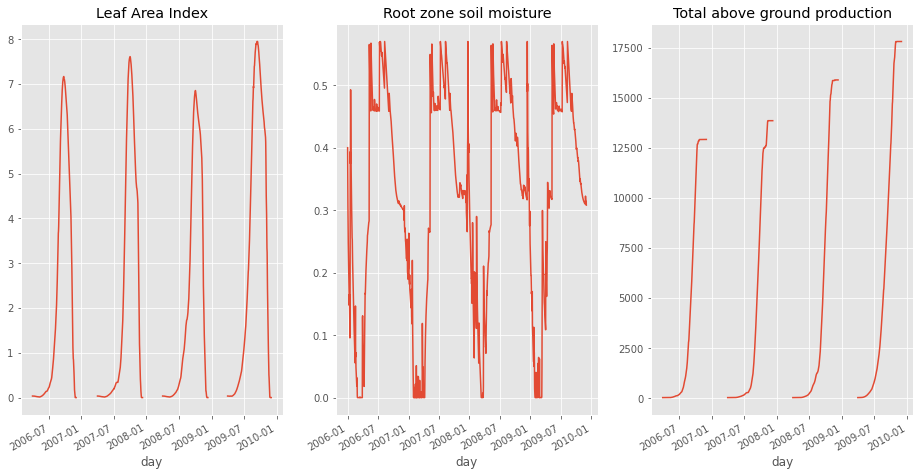

In [374]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,8))
df['LAI'].plot(ax=axes[0], title="Leaf Area Index")
df['SM'].plot(ax=axes[1], title="Root zone soil moisture")
df['TAGP'].plot(ax=axes[2], title="Total above ground production")
fig.autofmt_xdate()
